# Assignment 5 

In this Notebook, I'll predict the outcomes (identify a voice as male or female) using either Random Forest，data set from [Gender Recognition by Voice](https://www.kaggle.com/primaryobjects/voicegender/home)

Random forest, consists by a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest gives a class prediction and the class with the most votes becomes the model’s prediction.

In Decision tree, we compare the values of an attribute with the record’s attribute, then follow the branch corresponding to that value and jump to the next node. On the basis of comparison, we can finally predict a class label.
By learning simple decision rules inferred from training data, we can create a training model, that can be used to predict the class or value of the target variable.
 

In [2]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Importing the data

In [3]:
#let's read the data first, to check the columns details
df = pd.read_csv('voice.csv')  
df = df.dropna() #Let's get rid of rows with empty cells 
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 544.5+ KB


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


The data consists of 20 variables, and *label* .
We are predicting *label*: was the voice of malevor female.  

In [4]:
df['label'].value_counts()

female    1584
male      1584
Name: label, dtype: int64

Male and Female data distribution is exact the same.  

I have no related knowledge on the acoustic properties, and I decide to check the 20 variables' mean value of male and female first, to see if there is any difference.  

In [6]:
df_male = df[df.label == 'male']
df_female = df[df.label == 'female']
#df_male.head()
#df_female.head()
df_male.mean(axis = 0) 

meanfreq     0.170813
sd           0.065110
median       0.175299
Q25          0.115562
Q75          0.226346
IQR          0.110784
skew         3.295460
kurt        48.331698
sp.ent       0.917188
sfm          0.471670
mode         0.152022
centroid     0.170813
meanfun      0.115872
minfun       0.034175
maxfun       0.253836
meandom      0.728877
mindom       0.040307
maxdom       4.358447
dfrange      4.318139
modindx      0.177430
dtype: float64

In [7]:
df_female.mean(axis = 0) 

meanfreq     0.191000
sd           0.049142
median       0.195942
Q25          0.165349
Q75          0.223184
IQR          0.057834
skew         2.984875
kurt        24.805224
sp.ent       0.873066
sfm          0.344763
mode         0.178541
centroid     0.191000
meanfun      0.169742
minfun       0.039429
maxfun       0.263848
meandom      0.929544
mindom       0.064987
maxdom       5.736107
dfrange      5.671120
modindx      0.170073
dtype: float64

In [37]:
df['label'].replace({'male': 0, 'female' :1} , inplace = True)
df['label'] = df['label'].astype(int) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null int32
dtypes: float64(20), int32(1)
memory usage: 532.1 KB


After compare the mean value of all 20 variables, I decide to choose the 7 most different variables :

*Q25* , *skew*, *kurt*, *sfm*, *meanfun*, *meandom*, *dfrange*

In [38]:
df_new = df[['Q25','skew','kurt','sfm','meanfun','meandom','dfrange','label']]
df_new.head()

,Q25,skew,kurt,sfm,meanfun,meandom,dfrange,label
0,0.015071,12.863462,274.402906,0.491918,0.084279,0.007812,0.000000,0
1,0.019414,22.423285,634.613855,0.513724,0.107937,0.009014,0.046875,0
2,0.008701,30.757155,1024.927705,0.478905,0.098706,0.007990,0.007812,0
3,0.096582,1.232831,4.177296,0.727232,0.088965,0.201497,0.554688,0
4,0.078720,1.101174,4.333713,0.783568,0.106398,0.712812,5.476562,0


Then get X and Y and split the data.

In [45]:
X = df_new.loc[:,'Q25':'dfrange'] #This gets all the columns from Time to Amount
y = df_new['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Training the algorithm

I'll try to train the Random Forest algorithm. 
RF uses randomness, so we need to set a random_state if we want the result to be stable for presentation purposes.

I've also set the number of trees (n_estimators) to 100, same as we did in class. 

In [46]:
rf = RandomForestClassifier(random_state=1, n_estimators=100)  
rf = rf.fit(X_train, y_train)

## Evaluating the model

Then evaluate the model using our standard approach for a *classification* problem: making a confusion matrix and calculating accuracy, precision and recall.
 

In [47]:
y_pred = rf.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_pred) #creates a "confusion matrix"
cm = pd.DataFrame(cm, index=['male (actual)', 'female (actual)'], columns = ['male (pred)', 'female (pred)']) #label and make df
cm

,male (pred),female (pred)
male (actual),476,18
female (actual),11,446


As we can see from the confusion matrix, most prediction are correct. And this model predict female voice better than male voice.


Then, use classification_report to get accuracy, precision and recall.

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       494
           1       0.96      0.98      0.97       457

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



The precision for gender voice is very good (very close to 1): only about 2% of the suspected male's voice turn out to be female's, and 4% of the suspected female's voice turn out to be male's.
The recall is also quite good, only 2~4% wrong prediction. 

## Making use of probabilities
Also try to get the probabilities using predict_proba.  

In [51]:
y_pred_prob = rf.predict_proba(X_test) #Instead of classes, we now get the probabilities
y_pred_prob

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.02, 0.98]])

This is a two-dimensional array, with probabilities for male (0) and female(1). 

Let's visualize the probabilities to see.

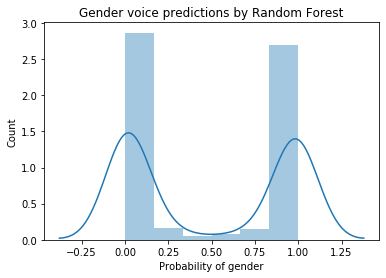

In [55]:
gender_prob = y_pred_prob[:,1]  
sns.distplot(gender_prob)
plt.xlabel("Probability of gender")
plt.ylabel("Count")
plt.title("Gender voice predictions by Random Forest")
plt.show()

As we can see from the distribution,the model I made do better in predict male's voice than female's voice. 